## Attachment

# Residence Reccomendation Data Analysis

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
# df = pd.read_csv('https://raw.githubusercontent.com/rdyzakya/DAC/master/Train.csv?token=ANMX7UVSDMRT7YXXECIV3KLA7T7TW')
df = pd.read_csv('Train.csv')

# Check data information

In [114]:
#delete unnecessary column
del df['Unnamed: 0']

#check information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_date          343583 non-null  object 
 1   site               343583 non-null  int64  
 2   continent_id       343583 non-null  int64  
 3   buyer_country      343583 non-null  int64  
 4   buyer_region       343583 non-null  int64  
 5   buyer_city         343583 non-null  int64  
 6   distance           145685 non-null  float64
 7   buyer_id           343583 non-null  int64  
 8   mobile             343583 non-null  int64  
 9   package            343583 non-null  int64  
 10  channel_id         343583 non-null  int64  
 11  buying_date        342885 non-null  object 
 12  dealing_date       342885 non-null  object 
 13  adults             343583 non-null  int64  
 14  children           343583 non-null  int64  
 15  room               343583 non-null  int64  
 16  de

Drop cnt, dealing, buyer_id to match the Test.csv

In [115]:
#since Test.csv doesn't have cnt and dealing it's best to drop it
#and drop the buyer_id as the buyer_id isn't needed for the modelling
df = df.drop(labels=['cnt','buyer_id','dealing'],axis=1)

There are null values in the distance, buying_date, dealing_date, before dropping any null values, check class loss in the categoric variables

In [116]:
#checking the unique values of each columns
def check_classloss(df,nclabel=[],dropped_label=[]):
  df2 = df.dropna(subset=dropped_label)
  df2 = df2.drop(labels=nclabel,axis=1)
  uni_len = {}
  for col in df2.columns:
    uni_len[col] = len(df2[col].unique())
  return uni_len

In [117]:
drop_nothing = check_classloss(df,['distance','time_date','buying_date','dealing_date'],[])
drop_allna = check_classloss(df,['distance','time_date','buying_date','dealing_date'],['distance','buying_date','dealing_date'])
drop_distance = check_classloss(df,['distance','time_date','buying_date','dealing_date'],['distance'])
drop_bdate = check_classloss(df,['distance','time_date','buying_date','dealing_date'],['buying_date'])
drop_ddate = check_classloss(df,['distance','time_date','buying_date','dealing_date'],['dealing_date'])

In [118]:
#if drop nothing
drop_nothing

{'site': 30,
 'continent_id': 5,
 'buyer_country': 155,
 'buyer_region': 653,
 'buyer_city': 7256,
 'mobile': 2,
 'package': 2,
 'channel_id': 11,
 'adults': 10,
 'children': 9,
 'room': 9,
 'destination_id': 9831,
 'destination_type': 8,
 'regency_continent': 40,
 'regency_country': 6,
 'regency_market': 179,
 'regency_cluster': 100}

In [119]:
#drop distance,buying_date,dealing_date
drop_allna

{'site': 23,
 'continent_id': 5,
 'buyer_country': 17,
 'buyer_region': 182,
 'buyer_city': 3073,
 'mobile': 2,
 'package': 2,
 'channel_id': 11,
 'adults': 10,
 'children': 8,
 'room': 8,
 'destination_id': 6636,
 'destination_type': 8,
 'regency_continent': 36,
 'regency_country': 6,
 'regency_market': 157,
 'regency_cluster': 100}

In [120]:
#drop distance only
drop_distance

{'site': 23,
 'continent_id': 5,
 'buyer_country': 17,
 'buyer_region': 182,
 'buyer_city': 3074,
 'mobile': 2,
 'package': 2,
 'channel_id': 11,
 'adults': 10,
 'children': 8,
 'room': 8,
 'destination_id': 6647,
 'destination_type': 8,
 'regency_continent': 36,
 'regency_country': 6,
 'regency_market': 157,
 'regency_cluster': 100}

In [121]:
#drop buying_date
drop_bdate

{'site': 30,
 'continent_id': 5,
 'buyer_country': 155,
 'buyer_region': 653,
 'buyer_city': 7249,
 'mobile': 2,
 'package': 2,
 'channel_id': 11,
 'adults': 10,
 'children': 9,
 'room': 8,
 'destination_id': 9811,
 'destination_type': 8,
 'regency_continent': 40,
 'regency_country': 6,
 'regency_market': 179,
 'regency_cluster': 100}

In [122]:
#drop dealing_date
drop_ddate

{'site': 30,
 'continent_id': 5,
 'buyer_country': 155,
 'buyer_region': 653,
 'buyer_city': 7249,
 'mobile': 2,
 'package': 2,
 'channel_id': 11,
 'adults': 10,
 'children': 9,
 'room': 8,
 'destination_id': 9811,
 'destination_type': 8,
 'regency_continent': 40,
 'regency_country': 6,
 'regency_market': 179,
 'regency_cluster': 100}

# Data Transformation

since there are class losses in the categoric features if the distance/buying_date/dealing_date is dropped
hence, decides to fill the null values

In [125]:
#extracting the dates for filling the null values

#changing data types
df['time_date'] = pd.to_datetime(df['time_date'])
df['buying_date'] = pd.to_datetime(df['buying_date'])
df['dealing_date'] = pd.to_datetime(df['dealing_date'])

#time_date
df['day_time_date'] = df['time_date'].dt.day
df['month_time_date'] = df['time_date'].dt.month
df['year_time_date'] = df['time_date'].dt.year

#buying_date
df['day_buying_date'] = df['buying_date'].dt.day
df['month_buying_date'] = df['buying_date'].dt.month
df['year_buying_date'] = df['buying_date'].dt.year

#dealing_date
df['day_dealing_date'] = df['dealing_date'].dt.day
df['month_dealing_date'] = df['dealing_date'].dt.month
df['year_dealing_date'] = df['dealing_date'].dt.year

#drop the dates
df = df.drop(labels=['time_date','buying_date','dealing_date'],axis=1)

## Fill Null Values

In [126]:
df['distance_bin'] = pd.qcut(df['distance'],q=4,labels=[0,1,2,3])
df['distance_bin'] = df['distance_bin'].cat.add_categories(-1)
df['distance_bin'] = df['distance_bin'].fillna(value=-1)
df['distance_bin'] = df['distance_bin'].astype(int).astype('category')

#to bin the distance in Test.csv
distance_bin = pd.qcut(df['distance'],q=4).unique()

In [127]:
#fill null values with -1
df = df.fillna(value=-1)

# Feature Selection

In [128]:
#define the x columns and y column
x_cols = df.columns.to_list()
y_col = 'regency_cluster'
x_cols.remove('regency_cluster')
x_cols.remove('distance')

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

def create_fs(xtrain,ytrain,method):
  fs = SelectKBest(score_func=method,k='all')
  fs.fit(xtrain,ytrain)
  return fs

def print_fs_score(x_cols,fs):
  for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (x_cols[i], fs.scores_[i]))

In [131]:
#create feature selection using mutual information
fs_mi = create_fs(df[x_cols],df[y_col],mutual_info_classif)

In [132]:
print("Feature score for mutual information feature selection\n")
print_fs_score(x_cols,fs_mi)

Feature score for mutual information feature selection

Feature site: 0.126481
Feature continent_id: 0.106386
Feature buyer_country: 0.167690
Feature buyer_region: 0.234650
Feature buyer_city: 0.511225
Feature mobile: 0.000000
Feature package: 0.030740
Feature channel_id: 0.016649
Feature adults: 0.023396
Feature children: 0.012530
Feature room: 0.004241
Feature destination_id: 1.416510
Feature destination_type: 0.032782
Feature regency_continent: 0.003482
Feature regency_country: 0.427398
Feature regency_market: 0.758817
Feature day_time_date: 0.004808
Feature month_time_date: 0.007425
Feature year_time_date: 0.007240
Feature day_buying_date: 0.008460
Feature month_buying_date: 0.014674
Feature year_buying_date: 0.009268
Feature day_dealing_date: 0.010553
Feature month_dealing_date: 0.009297
Feature year_dealing_date: 0.009055
Feature distance_bin: 0.105644


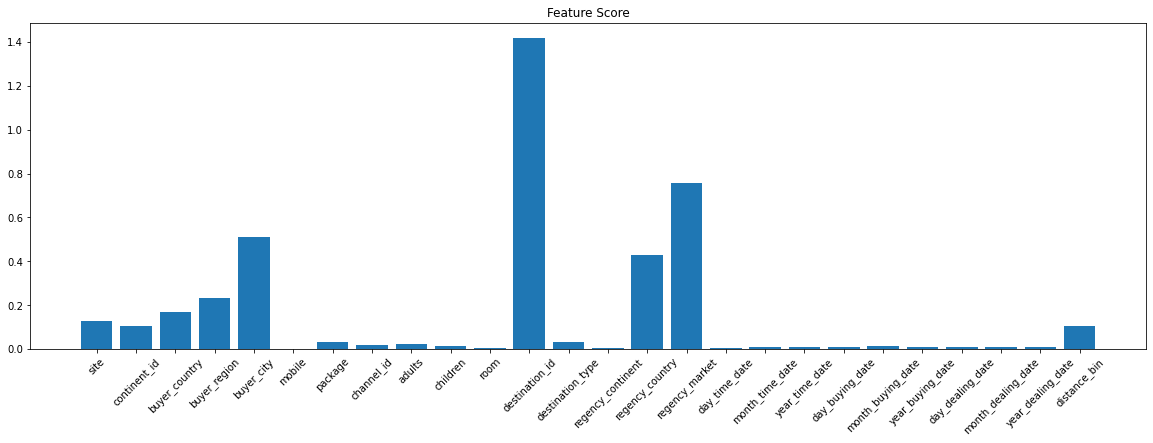

In [134]:
#plotting the feature selection result

fig,ax = plt.subplots(figsize=(20,6))
plt.bar(x_cols,fs_mi.scores_)
plt.xticks(rotation=45)
plt.title('Feature Score')
plt.show()

In [21]:
#select certain columns chosen from the feature selection
df2 = df[['site','continent_id','buyer_country','buyer_region','buyer_city','destination_id','regency_country','regency_market','distance_bin','regency_cluster']].copy()

In [22]:
#changing the datatypes into categories
for col in df2.columns:
  df2[col] = df2[col].astype('category')

In [23]:
#make sure there are no class loss in the way of preprocessing
check_classloss(df2,[],[])

{'site': 30,
 'continent_id': 5,
 'buyer_country': 155,
 'buyer_region': 653,
 'buyer_city': 7256,
 'destination_id': 9831,
 'regency_country': 6,
 'regency_market': 179,
 'distance_bin': 5,
 'regency_cluster': 100}

Check the balance of the target feature

<AxesSubplot:>

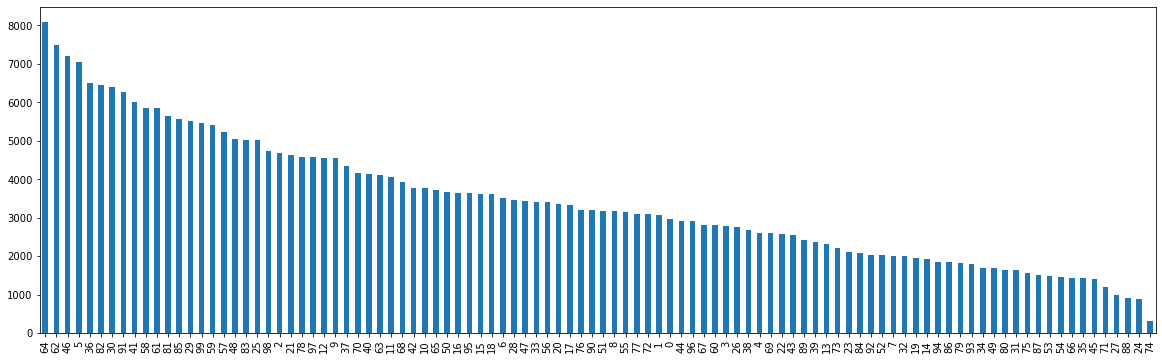

In [25]:
df2.regency_cluster.value_counts().plot(kind='bar',figsize=(20,6))

# Data Balancing

In [26]:
#class with least value counts
valcnt = df2['regency_cluster'].value_counts()
print("Class with the least value counts : " + str(valcnt[valcnt == valcnt.min()].index[0]))
print("with the value counts : " + str(valcnt.min()))

Class with the least value counts : 74
with the value counts : 324


In [27]:
#shuffle the dataset
df2 = df2.sample(frac=1, random_state=13519000)

#get classes
classes = df2['regency_cluster'].unique()

#initial dataset
df_balanced = df2.loc[df2['regency_cluster'] == valcnt[valcnt == valcnt.min()].index[0]]

#trimming each class to 324 and concat to new dataframe
for c in classes:
  if c != 74:
    trimmed_class = df2.loc[df2['regency_cluster'] == c][:valcnt.min()]
    df_balanced = pd.concat([df_balanced,trimmed_class])

In [28]:
check_classloss(df_balanced,[],[])

{'site': 28,
 'continent_id': 5,
 'buyer_country': 126,
 'buyer_region': 523,
 'buyer_city': 4046,
 'destination_id': 4187,
 'regency_country': 6,
 'regency_market': 151,
 'distance_bin': 5,
 'regency_cluster': 100}

There are class loss if undersampling is chosen
choosing oversampling rather than undersampling to prevent any class loss, so the model would handle
all class in the features

In [31]:
# OVER SAMPLING
from collections import Counter
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTEN

# shuffle the dataset
dfnew = df2.copy()
X = dfnew.loc[:, dfnew.columns != 'regency_cluster'].copy()
X = X.to_numpy()
y = dfnew.loc[:, dfnew.columns == 'regency_cluster'].copy()
y = y.to_numpy().flatten()

In [32]:
print(f'Original dataset shape {X.shape}')
# Original dataset shape (jml row, jml colom)
print(f'Original dataset samples per class {Counter(y)}')
# Original dataset samples per class Counter({kelas1: jml, kelas2: jml})

Original dataset shape (343583, 9)
Original dataset samples per class Counter({64: 8077, 62: 7486, 46: 7195, 5: 7041, 36: 6491, 82: 6445, 30: 6386, 91: 6277, 41: 6008, 58: 5850, 61: 5849, 81: 5649, 85: 5562, 29: 5503, 99: 5451, 59: 5414, 57: 5237, 48: 5057, 83: 5021, 25: 5009, 98: 4745, 2: 4671, 21: 4627, 78: 4582, 97: 4572, 12: 4561, 9: 4559, 37: 4346, 70: 4163, 40: 4124, 63: 4120, 11: 4051, 68: 3918, 42: 3778, 10: 3769, 65: 3732, 50: 3656, 16: 3649, 95: 3646, 15: 3626, 18: 3606, 6: 3510, 28: 3457, 47: 3426, 33: 3415, 56: 3408, 20: 3356, 17: 3324, 76: 3206, 90: 3192, 51: 3186, 8: 3169, 55: 3139, 77: 3091, 72: 3085, 1: 3058, 0: 2959, 44: 2922, 96: 2907, 67: 2819, 60: 2808, 3: 2778, 26: 2749, 38: 2690, 4: 2610, 69: 2604, 22: 2587, 43: 2548, 89: 2409, 39: 2373, 13: 2320, 73: 2221, 23: 2119, 84: 2071, 92: 2032, 52: 2029, 7: 2004, 32: 2001, 19: 1952, 14: 1935, 94: 1859, 86: 1847, 79: 1827, 93: 1804, 34: 1704, 49: 1688, 80: 1636, 31: 1634, 75: 1565, 87: 1503, 53: 1471, 54: 1450, 66: 1440, 3

In [33]:
# fitting using SMOTENC
sm1 = SMOTENC(random_state=42, categorical_features=[0,1,2,3,4,5,6,7])
X_res1, y_res1 = sm1.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res1)}')

Resampled dataset samples per class Counter({98: 8077, 36: 8077, 99: 8077, 21: 8077, 50: 8077, 46: 8077, 77: 8077, 64: 8077, 91: 8077, 86: 8077, 5: 8077, 42: 8077, 18: 8077, 41: 8077, 59: 8077, 70: 8077, 87: 8077, 79: 8077, 17: 8077, 60: 8077, 53: 8077, 25: 8077, 62: 8077, 3: 8077, 78: 8077, 82: 8077, 45: 8077, 38: 8077, 61: 8077, 15: 8077, 26: 8077, 30: 8077, 85: 8077, 11: 8077, 0: 8077, 7: 8077, 92: 8077, 67: 8077, 22: 8077, 96: 8077, 81: 8077, 43: 8077, 23: 8077, 20: 8077, 19: 8077, 76: 8077, 72: 8077, 48: 8077, 10: 8077, 31: 8077, 29: 8077, 57: 8077, 35: 8077, 8: 8077, 16: 8077, 95: 8077, 94: 8077, 58: 8077, 83: 8077, 47: 8077, 6: 8077, 24: 8077, 54: 8077, 39: 8077, 90: 8077, 13: 8077, 89: 8077, 32: 8077, 1: 8077, 49: 8077, 68: 8077, 2: 8077, 12: 8077, 14: 8077, 97: 8077, 28: 8077, 63: 8077, 9: 8077, 40: 8077, 34: 8077, 66: 8077, 37: 8077, 80: 8077, 4: 8077, 51: 8077, 56: 8077, 44: 8077, 93: 8077, 75: 8077, 73: 8077, 33: 8077, 84: 8077, 71: 8077, 65: 8077, 52: 8077, 74: 8077, 27: 8

In [34]:
# fitting using SMOTEN
sm2 = SMOTEN(random_state=42)
X_res2, y_res2 = sm2.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res2)}')

Resampled dataset samples per class Counter({98: 8077, 36: 8077, 99: 8077, 21: 8077, 50: 8077, 46: 8077, 77: 8077, 64: 8077, 91: 8077, 86: 8077, 5: 8077, 42: 8077, 18: 8077, 41: 8077, 59: 8077, 70: 8077, 87: 8077, 79: 8077, 17: 8077, 60: 8077, 53: 8077, 25: 8077, 62: 8077, 3: 8077, 78: 8077, 82: 8077, 45: 8077, 38: 8077, 61: 8077, 15: 8077, 26: 8077, 30: 8077, 85: 8077, 11: 8077, 0: 8077, 7: 8077, 92: 8077, 67: 8077, 22: 8077, 96: 8077, 81: 8077, 43: 8077, 23: 8077, 20: 8077, 19: 8077, 76: 8077, 72: 8077, 48: 8077, 10: 8077, 31: 8077, 29: 8077, 57: 8077, 35: 8077, 8: 8077, 16: 8077, 95: 8077, 94: 8077, 58: 8077, 83: 8077, 47: 8077, 6: 8077, 24: 8077, 54: 8077, 39: 8077, 90: 8077, 13: 8077, 89: 8077, 32: 8077, 1: 8077, 49: 8077, 68: 8077, 2: 8077, 12: 8077, 14: 8077, 97: 8077, 28: 8077, 63: 8077, 9: 8077, 40: 8077, 34: 8077, 66: 8077, 37: 8077, 80: 8077, 4: 8077, 51: 8077, 56: 8077, 44: 8077, 93: 8077, 75: 8077, 73: 8077, 33: 8077, 84: 8077, 71: 8077, 65: 8077, 52: 8077, 74: 8077, 27: 8

In [35]:
#balanced data
df3 = pd.DataFrame(X_res2,columns=['site','continent_id','buyer_country','buyer_region','buyer_city','destination_id','regency_country','regency_market','distance_bin'])
df3['regency_cluster'] = pd.Series(y_res2)

In [52]:
#balanced data
df4 = pd.DataFrame(X_res1,columns=['site','continent_id','buyer_country','buyer_region','buyer_city','destination_id','regency_country','regency_market','distance_bin'])
df4['regency_cluster'] = pd.Series(y_res1)

In [38]:
#changing the datatypes into categories
for col in df3.columns:
  df3[col] = df3[col].astype(int).astype('category')

In [53]:
#changing the datatypes into categories
for col in df4.columns:
  df4[col] = df4[col].astype(int).astype('category')

<AxesSubplot:>

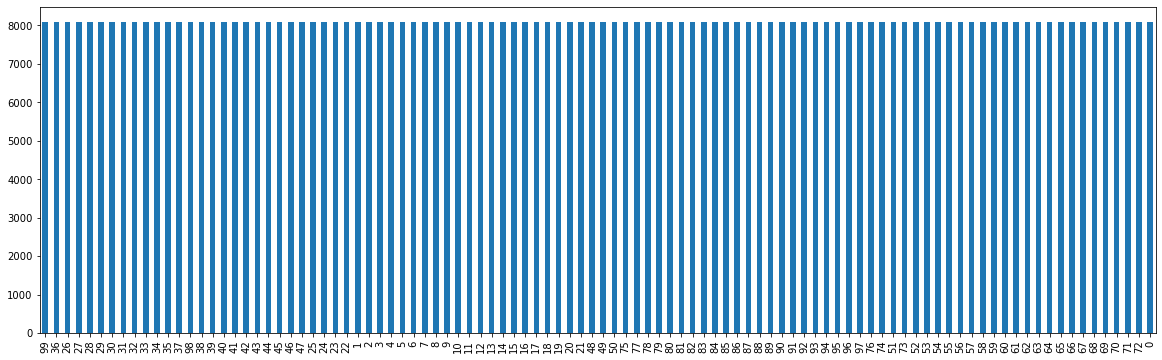

In [39]:
#plotting the bar
df3['regency_cluster'].value_counts().plot(kind='bar',figsize=(20,6))

In [40]:
check_classloss(df3,[],[])

{'site': 30,
 'continent_id': 5,
 'buyer_country': 155,
 'buyer_region': 653,
 'buyer_city': 7256,
 'destination_id': 9831,
 'regency_country': 6,
 'regency_market': 179,
 'distance_bin': 5,
 'regency_cluster': 100}

# Modelling

In [137]:
x_cols = df3.columns.to_list()
x_cols.remove('regency_cluster')
y_col = 'regency_cluster'

In [42]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Instantiate model with 30 decision trees using entropy
rf1 = RandomForestClassifier(n_estimators = 30, random_state = 13519000, criterion='entropy')

# rf1.fit(x_train,y_train)

# Instantiate model with 30 decision trees using gini
rf2 = RandomForestClassifier(n_estimators = 30, random_state = 13519000, criterion='entropy')

# rf2.fit(x_train,y_train)

In [48]:
#SMOTENed dataset
df3_x = df3[x_cols].copy()
df3_y = df3[y_col].copy()

In [54]:
#SMOTENC-ed dataset
df4_x = df4[x_cols].copy()
df4_y = df4[y_col].copy()

In [81]:
#imbalance dataset
df2_x = df2[x_cols].copy()
df2_y = df2[y_col].copy()

# Validation

In [50]:
scores_entropy = cross_val_score(rf1, df3_x, df3_y, cv=10)
scores_gini = cross_val_score(rf2, df3_x, df3_y, cv=10)

In [55]:
print(scores_entropy)

[0.33892534 0.35124427 0.41281416 0.46211465 0.52484833 0.55373282
 0.5688003  0.57953448 0.58427634 0.58718584]


In [56]:
print(scores_gini)

[0.33892534 0.35124427 0.41281416 0.46211465 0.52484833 0.55373282
 0.5688003  0.57953448 0.58427634 0.58718584]


In [68]:
scores_entropy2 = cross_val_score(rf1, df4_x, df4_y, cv=10)
scores_gini2 = cross_val_score(rf2, df4_x, df4_y, cv=10)

In [69]:
print(scores_entropy2)

[0.35752136 0.36668317 0.40974372 0.44803764 0.49144484 0.51259131
 0.52536833 0.53549585 0.53793488 0.53909868]


In [70]:
print(scores_gini2)

[0.35752136 0.36668317 0.40974372 0.44803764 0.49144484 0.51259131
 0.52536833 0.53549585 0.53793488 0.53909868]


In [82]:
scores_entropy3 = cross_val_score(rf1, df2_x, df2_y, cv=10)
scores_gini3 = cross_val_score(rf2, df2_x, df2_y, cv=10)

In [89]:
print("Random Forest Classifier:")
print("Accuracy for using SMOTEN-ed dataset using entropy criterion:", scores_entropy.mean()*100, "%")
print("Accuracy for using SMOTEN-ed dataset using gini criterion:", scores_gini.mean()*100, "%")

Random Forest Classifier:
Accuracy for using SMOTEN-ed dataset using entropy criterion: 49.63476538318684 %
Accuracy for using SMOTEN-ed dataset using gini criterion: 49.63476538318684 %


In [90]:
print("Random Forest Classifier:")
print("Accuracy for using SMOTENC-ed dataset using entropy criterion:", scores_entropy2.mean()*100, "%")
print("Accuracy for using SMOTENC-ed dataset using gini criterion:", scores_gini2.mean()*100, "%")

Random Forest Classifier:
Accuracy for using SMOTENC-ed dataset using entropy criterion: 47.23919772192646 %
Accuracy for using SMOTENC-ed dataset using gini criterion: 47.23919772192646 %


In [96]:
print("Random Forest Classifier:")
print("Accuracy for using imbalance dataset using entropy criterion:", scores_entropy3.mean()*100, "%")
print("Accuracy for using imbalance dataset using gini criterion:", scores_gini3.mean()*100, "%")

Random Forest Classifier:
Accuracy for using imbalance dataset using entropy criterion: 28.226368070840703 %
Accuracy for using imbalance dataset using gini criterion: 28.226368070840703 %


In [84]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion='entropy', random_state=13519000)

dt2 = DecisionTreeClassifier(criterion='gini', random_state=13519000)

In [85]:
scores_entropy_dt1 = cross_val_score(dt1, df3_x, df3_y, cv=10)
scores_gini_dt1 = cross_val_score(dt2, df3_x, df3_y, cv=10)

In [92]:
print("Decision Tree Classifier:")
print("Accuracy for using SMOTEN-ed dataset using entropy criterion:", scores_entropy_dt1.mean()*100, "%")
print("Accuracy for using SMOTEN-ed dataset using gini criterion:", scores_gini_dt1.mean()*100, "%")

Decision Tree Classifier:
Accuracy for using SMOTEN-ed dataset using entropy criterion: 49.81775411662747 %
Accuracy for using SMOTEN-ed dataset using gini criterion: 49.779868763154624 %


In [87]:
scores_entropy_dt2 = cross_val_score(dt1, df4_x, df4_y, cv=10)
scores_gini_dt2 = cross_val_score(dt2, df4_x, df4_y, cv=10)

In [93]:
print("Decision Tree Classifier:")
print("Accuracy for using SMOTENC-ed dataset using entropy criterion:", scores_entropy_dt2.mean()*100, "%")
print("Accuracy for using SMOTENC-ed dataset using gini criterion:", scores_gini_dt2.mean()*100, "%")

Decision Tree Classifier:
Accuracy for using SMOTENC-ed dataset using entropy criterion: 47.297635260616566 %
Accuracy for using SMOTENC-ed dataset using gini criterion: 47.1994552432834 %


In [88]:
scores_entropy_dt3 = cross_val_score(dt1, df2_x, df2_y, cv=10)
scores_gini_dt3 = cross_val_score(dt2, df2_x, df2_y, cv=10)

In [95]:
print("Decision Tree Classifier:")
print("Accuracy for using imbalance dataset using entropy criterion:", scores_entropy_dt3.mean()*100, "%")
print("Accuracy for using imbalance dataset using gini criterion:", scores_gini_dt3.mean()*100, "%")

Decision Tree Classifier:
Accuracy for using imbalance dataset using entropy criterion: 28.409439088215382 %
Accuracy for using imbalance dataset using gini criterion: 28.380333463333457 %


# Predict

In [105]:
def prediction(model,df,xcols,ycol):
    df_ = df.copy()
    df_['distance_bin'] = pd.cut(df_.distance,[0.0046, 326.593, 1100.383, 2808.036, 11761.396],labels=[0,1,2,3])
    df_['distance_bin'] = df_.distance_bin.cat.add_categories(-1)
    df_['distance_bin'] = df_.distance_bin.fillna(value=-1)
    df_2 = df_[xcols]
    df_[ycol] = model.predict(df_2)
    return df_[['id',ycol]]

In [98]:
submission = pd.read_csv('Test.csv')
del submission['Unnamed: 0']

In [99]:
#decision tree with SMOTEN-ed dataset and entropy criterion is chosen

#fit the model
dt1.fit(df3_x,df3_y)

DecisionTreeClassifier(criterion='entropy', random_state=13519000)

In [106]:
#predict
submission_result = prediction(dt1,submission,x_cols,y_col)

In [147]:
#create csv file of the prediction
submission_result.to_csv('DecisionTreeSubmission.csv', index=False)